In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('paper')
%matplotlib inline
import scipy.linalg as la
from scipy.special import erf

# Third-party dependencies
from astropy.io import ascii
import astropy.units as u
from astropy.constants import G
from astropy import constants as const
import astropy.coordinates as coord

from gala.units import galactic
import gala.dynamics as gd
import gala.potential as gp
gp.

import pandas as pd

In [10]:
lmcr = np.array([-1.1, -41.1, -27.9])
lmcv = np.array([-57., -226., 221.])

## read in data from Bennet+22b

In [11]:
data = pd.read_csv('Bennet22_LMC_Cluster_final_sample_corr.csv')
names = data['Name']
print(names, data.keys())

0       NGC1466
1       NGC1644
2       NGC1651
3       NGC1652
4       NGC1754
5       NGC1783
6       NGC1786
7       NGC1806
8       NGC1818
9       NGC1831
10      NGC1835
11      NGC1841
12      NGC1866
13      NGC1868
14      NGC1898
15      NGC1916
16      NGC1928
17      NGC1939
18      NGC1978
19      NGC2005
20      NGC2019
21      NGC2162
22      NGC2173
23      NGC2190
24      NGC2209
25      NGC2231
26      NGC2257
27       HODGE4
28      HODGE11
29    Reticulum
30      NGC2159
31      NGC2210
Name: Name, dtype: object Index(['RA', 'DEC', 'dis_mod', 'dis_mod_err', 'Distance_old', 'Distance',
       'Dis_error', 'Unnamed: 7', 'Distance_disk', 'Name', 'RAJ2000',
       'DEJ2000', 'VMAG', 'logAge', 'e_logAge', 'logM', 'Metal', 'Ref',
       'OName', 'SimbadName', 'RJacobi', 'V', 'e_V', 'V_ref', 'Notes', 'ra_pm',
       'e_ra_pm', 'd_pm', 'e_d_pm', 'Source', 'Paper_source', 'Other Sources'],
      dtype='object')


In [12]:
def v_esc_boubert(x):
    return (252.1 - 26.74734*x + 2.44534040*(x**2.) - 0.164199176*(x**3.) + 6.24490163e-3*(x**4.) - 9.04817931e-5*(x**5.))

In [13]:
print(len(data['Name']))

32


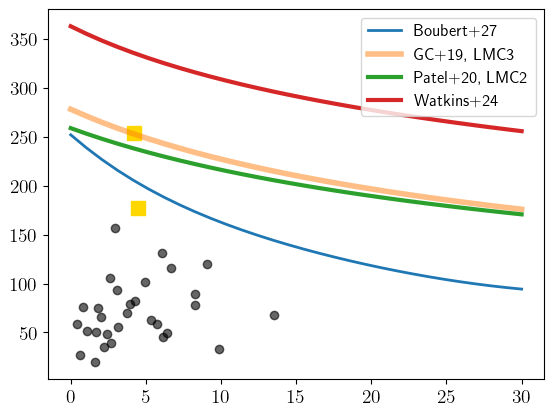

In [48]:
plt.figure()
for i in range(len(data['Name'])):
    icrs = coord.SkyCoord(ra=data['RA'][i]*u.deg, dec= data['DEC'][i]*u.deg, distance=data['Distance'][i]*u.kpc, 
            pm_ra_cosdec=data['ra_pm'][i]*u.mas/u.yr, pm_dec=data['d_pm'][i]*u.mas/u.yr, radial_velocity=data['V'][i]*u.km/u.s)
    
    galcen_frame = coord.Galactocentric()
    galcen = icrs.transform_to(galcen_frame)
    sat = gd.PhaseSpacePosition(galcen.cartesian)
    satr, satv  = sat.xyz.value, sat.v_xyz.value
    #print(satr, satv)
    plt.plot(la.norm(satr-lmcr), la.norm(satv-lmcv), 'ko',ms=6, alpha=0.6)
    if data['Name'][i] in ['NGC2210', 'NGC2159']:
        plt.plot(la.norm(satr-lmcr), la.norm(satv-lmcv), marker='s',ms=10,c='gold')
    #plt.text(la.norm(satr-lmcr), la.norm(satv-lmcv),'%s'%data['Name'][i], fontsize=8)
                                                    
    
plt.plot(np.linspace(0,30,30), v_esc_boubert(np.linspace(0,15,30)),label='Boubert+27')
lmc_hernquist = gp.HernquistPotential(m=1.8e11*u.Msun, c=20.*u.kpc, units=galactic)
lmc_hernquist2 = gp.HernquistPotential(m=1.8e11*u.Msun, c=23.1*u.kpc, units=galactic)

plt.plot(np.linspace(0,30,30), np.sqrt(-2*lmc_hernquist.energy([np.linspace(0,30,30)*u.kpc, np.zeros(30), np.zeros(30)])).to(u.km/u.s), lw=4, alpha=0.5, label='GC+19, LMC3')

plt.plot(np.linspace(0,30,30), np.sqrt(-2*lmc_hernquist2.energy([np.linspace(0,30,30)*u.kpc, np.zeros(30), np.zeros(30)])).to(u.km/u.s), lw=3,  label='Patel+20, LMC2')
lmc_nfw = gp.NFWPotential(m=1.8e11*u.Msun, r_s = 148/12.6, units=galactic)
plt.plot(np.linspace(0,30,30), np.sqrt(-2*lmc_nfw.energy([np.linspace(0,30,30)*u.kpc, np.zeros(30), np.zeros(30)])).to(u.km/u.s), lw=3,  label='Watkins+24')
# plt.xlim(0,25)
# plt.ylim(0,325)
plt.legend()